# Описание проекта

# 1. Загрузка и подготовка данных

Импортируем библиотеки

In [1]:
import pandas as pd

Выгрузим каждый файл по отдельности в датафреймы

In [2]:
df_0=pd.read_csv('/datasets/geo_data_0.csv')

In [3]:
df_1=pd.read_csv('/datasets/geo_data_1.csv')

In [4]:
df_2=pd.read_csv('/datasets/geo_data_2.csv')

In [5]:
df_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


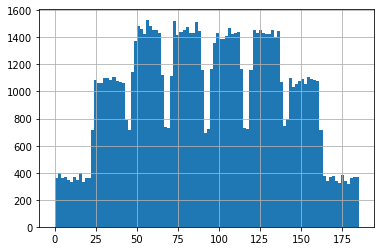

In [6]:
df_0['product'].hist(bins=100)

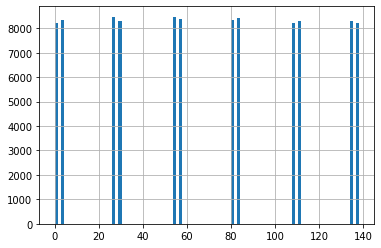

In [7]:
df_1['product'].hist(bins=100)

In [8]:
df_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


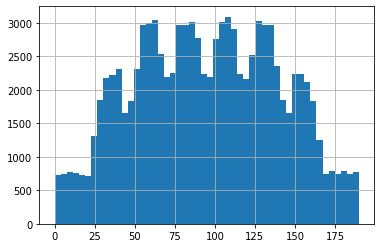

In [9]:
df_2['product'].hist(bins=50)

Даныне имеют по 10000 строк,распределение у 1 и 3 таблица имеет похожее на нормальное распределение, а во второй всех значений практически поровну, кроме двух столбцов по бокам

# 2. Обучение и проверка модели

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

In [11]:
state=np.random.RandomState(12345)

In [12]:
model=LinearRegression()

In [13]:
for df,k in zip((df_0,df_1,df_2),('df_0','df_1','df_2')):
    features=df.drop(['id','product'],axis=1)
    targets=df['product']
    features_train,features_valid, targets_train, targets_valid=train_test_split(features,targets,test_size=0.25,random_state=state)
    model.fit(features_train, targets_train)
    prediction=model.predict(features_valid)
    globals()[f'targets_valid_{k}']=targets_valid.copy()
    globals()[f'RMSE_{k}']=mean_squared_error(targets_valid, prediction)**0.5
    globals()[f'prediction_{k}']=prediction.copy()

In [14]:
df_predicted=pd.DataFrame(np.array([[RMSE_df_0, RMSE_df_1,RMSE_df_2],
                       [prediction_df_0.mean(), prediction_df_1.mean(), prediction_df_2.mean()],[targets_valid_df_0.mean(), targets_valid_df_1.mean(), targets_valid_df_2.mean()]]), 
             columns=['geo_data_0', 'geo_data_1', 'geo_data_2'],index=['RMSR','Prediction.Mean', 'Real.Mean'])

In [15]:
df_predicted

,geo_data_0,geo_data_1,geo_data_2
RMSR,37.579422,0.889737,39.958042
Prediction.Mean,92.592568,68.769951,95.087528
Real.Mean,92.078597,68.771624,94.748959


In [16]:
df_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [17]:
df_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


Размер RMSE самый низкий у 2ой таблицы, скорее всего это вызванно тем, что данные там равномерно распредлены,в то же вермя у 2ой таблицы значение среднего предсказанного значения самое низкой.
У 3ей таблицы мы видим самое большое значнеием ошибки, но при этом и среднее предсказаний- самое высокое.  
Низкое значение RMSE второй таблицы такое низкое из-за высокой корреляцией целевого признака с признаком f2.

# 3. Подготовка к расчёту прибыли

In [18]:
money_we_have=10**10

In [19]:
barell_cost=450*1000

In [20]:
sample_number=500

In [21]:
sample_top=400

In [22]:
billion=10**9

In [23]:
neccacary_volume= money_we_have / (barell_cost)

In [24]:
neccacary_volume

22222.222222222223

In [25]:
neccacary_volume /  sample_top

55.55555555555556

Для того, чтобы пробурить 200 скв мы затратим 10 млрд. руб.   
Для окупаемости данных инвестиций мы должны получить в среднем 111.11 тыс.баррелей на каждую скважину.  
Фактически для нашей модели, макисмальный доход мы имеем в 3ем регионе, а минимальный в 2м.

# 4. Расчёт прибыли и рисков 

In [26]:
def revenue(prediction,valid):
    sampling=pd.Series(prediction).sample(sample_number,replace=True,random_state=state)
    sampling_200=sampling.sort_values(ascending=False)[:sample_top]
    revenue_pred=(sampling_200.sum()*barell_cost - money_we_have)/ (billion)
    revenue_valid=(valid.iloc[sampling_200.index].sum()*barell_cost -money_we_have)/ (billion)
    return revenue_pred,revenue_valid
    
    

In [27]:
revenue_pred_df_0, revenue_valid_df_0=revenue(prediction_df_0,targets_valid_df_0)

In [28]:
revenue_pred_df_1, revenue_valid_df_1=revenue(prediction_df_1,targets_valid_df_1)

In [29]:
revenue_pred_df_2, revenue_valid_df_2=revenue(prediction_df_2,targets_valid_df_2)

In [30]:
pd.DataFrame(data=[[revenue_pred_df_0,revenue_pred_df_1,revenue_pred_df_2],[revenue_valid_df_0,revenue_valid_df_1,revenue_valid_df_2]], columns=['geo_data_0', 'geo_data_1', 'geo_data_2'],index=['Predicted, млрд.руб','Real, млрд.руб'])

,geo_data_0,geo_data_1,geo_data_2
"Predicted, млрд.руб",8.050740,4.729354,8.493148
"Real, млрд.руб",7.735044,4.729605,8.006721


Как видим, ТОП 200 скважин, позволяют нам получить доход, превышающий расходы на строительство.

### Bootstrap

In [31]:
from scipy import stats as st
import matplotlib.pyplot as plt

In [32]:
values_df_0=[]
values_df_1=[]
values_df_2=[]

geo_data_0
AxesSubplot(0.125,0.125;0.775x0.755)
Вероятность убытка: 0.0 %
Средняя прибыль: 8.06925000843809
95%-ый доверительный интервал для средней прибыли: (8.045481518279583, 8.093018498596596)
95%-ый доверительный интервал для прибыли: 7.313168384372428 - 8.814133830766012



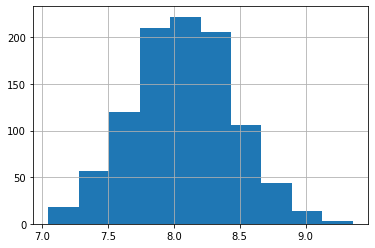

geo_data_1
AxesSubplot(0.125,0.125;0.775x0.755)
Вероятность убытка: 0.0 %
Средняя прибыль: 5.219819859819045
95%-ый доверительный интервал для средней прибыли: (5.19402546335273, 5.245614256285359)
95%-ый доверительный интервал для прибыли: 4.455594208045023 - 6.044039552059784



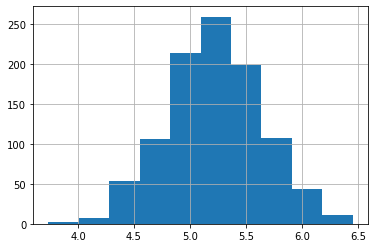

geo_data_2
AxesSubplot(0.125,0.125;0.775x0.755)
Вероятность убытка: 0.0 %
Средняя прибыль: 8.35560488779586
95%-ый доверительный интервал для средней прибыли: (8.330484939558998, 8.380724836032721)
95%-ый доверительный интервал для прибыли: 7.546894030450423 - 9.149978457243876



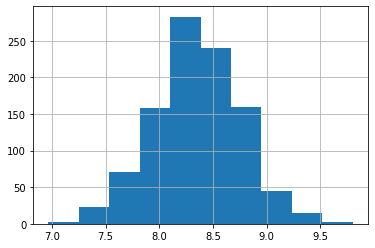

In [33]:
for predic,valid,val,geo in zip((prediction_df_0,prediction_df_1,prediction_df_2),
                                (targets_valid_df_0,targets_valid_df_1,targets_valid_df_2),
                                (values_df_0,values_df_1,values_df_2),
                                ('geo_data_0', 'geo_data_1', 'geo_data_2')):
        print(geo)
        for n in range(0,1000):
            pred,true=revenue(predic,valid)
            val.append(true)
        val=pd.Series(val)
        print(val.hist())
        print('Вероятность убытка:',val[val<0].count() / val.count() * 100,'%')
        print('Средняя прибыль:', val.mean())
        print("95%-ый доверительный интервал для средней прибыли:", st.t.interval(0.95, len(val)-1, loc=val.mean(), scale=val.sem()))
        print("95%-ый доверительный интервал для прибыли:", val.quantile(0.025),'-',val.quantile(0.975))
        print()
        plt.show()

### Вывод

Как видим, несмотря на то, что у 2ого объекта самое низкое среднее значение дебита скважин, по оценке мы можем видеть, что доверительный интервал имеет наибольшие границы средней прибыли, а вероятность убытков близка к 1%, что является минимальным значением.  
При этом прибыль с вероятностью 95% процентов будет находится в положительной зоне, в отличии от 1ого и 3го объекта.
По результатам проведенного анализа лучшим регионом для разработки можно считать 'geo_data_1'